Here is a short demonstration of Kipoi-interpret.

In [15]:
import kipoi
import kipoi_interpret
from kipoi_veff.utils.plot import seqlogo_heatmap
from concise.preprocessing.sequence import encodeDNA

In [16]:
kipoi_interpret.__version__

'0.1.1'

In [17]:
# list all available methods
kipoi_interpret.importance_scores.available_methods()

{'mutation': kipoi_interpret.importance_scores.ism.Mutation,
 'saliency': kipoi_interpret.importance_scores.gradient.Saliency,
 'grad*input': kipoi_interpret.importance_scores.gradient.GradientXInput,
 'grad': kipoi_interpret.importance_scores.gradient.Gradient,
 'deeplift': kipoi_interpret.importance_scores.referencebased.DeepLift,
 'intgrad': kipoi_interpret.importance_scores.referencebased.IntegratedGradients}

In [32]:
# Gradient-based methods
from kipoi_interpret.importance_scores.gradient import Gradient, GradientXInput
# In-silico mutagenesis-based methods
from kipoi_interpret.importance_scores.ism import Mutation
# DeepLift
from kipoi_interpret.importance_scores.referencebased import DeepLift

### Setup 

Model:

In [19]:
model = kipoi.get_model("DeepBind/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1")

2018-11-13 00:05:54,591 [INFO] Downloading model arguments arch from https://sandbox.zenodo.org/record/248887/files/Homo_sapiens-TF-D00765.001_ChIP-seq_GATA1?download=1
2018-11-13 00:05:54,593 [INFO] Downloading model arguments weights from https://sandbox.zenodo.org/record/248887/files/Homo_sapiens-TF-D00765.001_ChIP-seq_GATA1.h5?download=1
2018-11-13 00:05:54,698 [INFO] successfully loaded model architecture from <_io.TextIOWrapper name='/home/avsec/.kipoi/models/DeepBind/downloaded/model_files/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/arch/d0bf8403d0cfe0037537f6f2e002f5b6' mode='r' encoding='UTF-8'>
2018-11-13 00:05:54,781 [INFO] successfully loaded model weights from /home/avsec/.kipoi/models/DeepBind/downloaded/model_files/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/weights/9155558f7b04004dd50daf5903c5a514
2018-11-13 00:05:54,783 [INFO] dataloader.output_schema is compatible with model.schema


Using downloaded and verified file: /home/avsec/.kipoi/models/DeepBind/downloaded/model_files/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/arch/d0bf8403d0cfe0037537f6f2e002f5b6
Using downloaded and verified file: /home/avsec/.kipoi/models/DeepBind/downloaded/model_files/Homo_sapiens/TF/D00765.001_ChIP-seq_GATA1/weights/9155558f7b04004dd50daf5903c5a514


Sequence of interest:

In [20]:
seq = "ATGGGCCAGCACACAGACCAGCACGTTGCCCAGGAGCTGTGGGAGGAAGATAAGAGGTATGAACATGATTAGCAAAAGGGCCTAGCTTGGACTCAGAATAA"
seqa = encodeDNA([seq]) # one-hot-encode the sequence

## Gradient * input

In [21]:
grxinp = GradientXInput(model)
val = grxinp.score(seqa)[0]

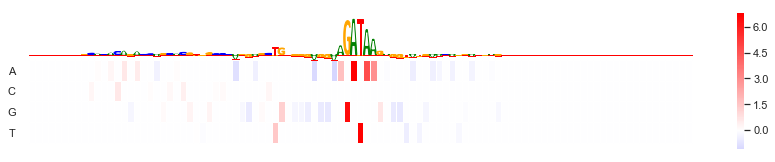

In [22]:
fig = plt.figure(figsize=(15,2.5))
seqlogo_heatmap(val, val.T, ax=plt.subplot())

## Gradient

In [23]:
gr = Gradient(model)
val = gr.score(seqa)[0]

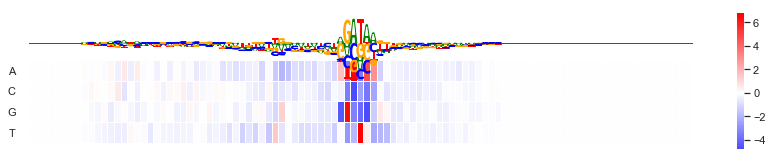

In [24]:
fig = plt.figure(figsize=(15,2.5))
seqlogo_heatmap(val, val.T, ax=plt.subplot())

## In-silico mutagenesis

In [25]:
def to_array(isval):
    """Temporary convert the output to a numpy array
    """
    def to_vec(x):
        if x is None:
            return 0
        else:
            if isinstance(x, list):
                return x[0]
            else:
                return x
    return np.array([[to_vec(y) for y in x] for x in isval])

In [26]:
ism = Mutation(model, "seq")
val = to_array(ism.score(seqa)[0])

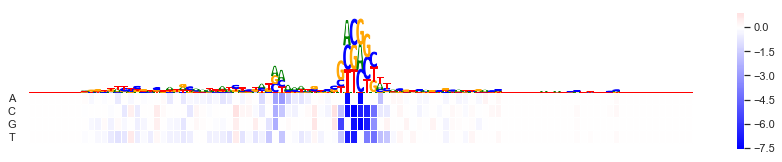

In [27]:
fig = plt.figure(figsize=(15,2.5))
seqlogo_heatmap(np.abs(val), val.T, ax=plt.subplot(), show_letter_scale=False)

## DeepLift

In [27]:
# Not a sequential model
# dl = DeepLift(model, 'maximum_593', 0)